In [1]:
# we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['ipywidgets'])
await piplite.install(['tqdm'])


# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# import the visualization package, seaborn:
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error

# Let's load the modules for linear regression:
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
df = pd.read_csv('GOOGL_Monthly_Forecast.csv')

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume,NextM_Close
0,10/1/2004,3.273273,5.003754,3.225726,4.770771,10272433284,4.554054
1,11/1/2004,4.843594,5.045045,4.036787,4.554054,11092660236,4.824575
2,12/1/2004,4.553303,5.002002,4.215966,4.824575,5807878308,4.895395
3,1/1/2005,4.939940,5.137638,4.411662,4.895395,8198389404,4.704454
4,2/1/2005,4.864364,5.425425,4.529530,4.704454,13011367608,4.517267


# 2. Multiple Linear Regression

In [4]:
# Let's use only numerical data

#df=df._get_numeric_data()
#df.head()

In [5]:
# Evaulate a MLR model:

Z = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Create the linear regression object:
lm = LinearRegression()
lm
lm.fit(Z, df['NextM_Close'])

LinearRegression()

In [6]:
#fit multiple linear regression model
model = ols('NextM_Close ~ Open + High + Low + Close + Volume', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            NextM_Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4100.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.28e-205
Time:                        16:20:18   Log-Likelihood:                -568.32
No. Observations:                 214   AIC:                             1149.
Df Residuals:                     208   BIC:                             1169.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5319      0.566      0.940      0.3

The results show us these variables can explain by 99% the variation of Next Month Close prices. 
The variables Open, High and Low are statistically significant for a significance level of 5% and 1% (Low).
Let's check which of them have a highest rating.

What is the linear function we get in this example?

Next Month Close Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

## Score calculation


In [7]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['Open'], df['NextM_Close'])

print("The Pearson Correlation Coefficient of Open is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Open is 0.9904465536354045  with a P-value of P = 2.1286889012918688e-184


In [8]:
pearson_coef, p_value = stats.pearsonr(df['High'], df['NextM_Close'])

print("The Pearson Correlation Coefficient of High is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of High is 0.9930695908902052  with a P-value of P = 4.083884258073922e-199


In [9]:
pearson_coef, p_value = stats.pearsonr(df['Low'], df['NextM_Close'])

print("The Pearson Correlation Coefficient of Low is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Low is 0.9942645100753394  with a P-value of P = 8.436891210913819e-208


Since the p-value is < 0.001, the correlation between these 3 variables and Next Month Close price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [10]:
pearson_coef, p_value = stats.pearsonr(df['Volume'], df['NextM_Close'])

print("The Pearson Correlation Coefficient of Volume is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Volume is -0.5307973083801926  with a P-value of P = 5.940042230213993e-17


Since the p-value is  <  0.001, the correlation between Volume and price is statistically significant, and the coefficient of about -0.231 shows that the relationship is negative and moderately strong.

In [11]:
# Libraries for plotting

from ipywidgets import interact, interactive, fixed, interact_manual

## Correlation

In [12]:
df.corr()

,Open,High,Low,Close,Volume,NextM_Close
Open,1.000000,0.997879,0.996593,0.994265,-0.524539,0.990447
High,0.997879,1.000000,0.997040,0.997489,-0.521688,0.993070
Low,0.996593,0.997040,1.000000,0.998146,-0.534380,0.994265
Close,0.994265,0.997489,0.998146,1.000000,-0.528166,0.994473
Volume,-0.524539,-0.521688,-0.534380,-0.528166,1.000000,-0.530797
NextM_Close,0.990447,0.993070,0.994265,0.994473,-0.530797,1.000000


Multicollinearity: We'll use only variables High and Volume

In [13]:
df[['Open','Volume', 'NextM_Close']].corr()

,Open,Volume,NextM_Close
Open,1.000000,-0.524539,0.990447
Volume,-0.524539,1.000000,-0.530797
NextM_Close,0.990447,-0.530797,1.000000


## Final Econometric Model

In [14]:
Z = df[['Open','Volume']]

In [15]:
lm.fit(Z, df['NextM_Close'])

LinearRegression()

In [16]:
#fit multiple linear regression model
model = ols('NextM_Close ~ Open + Volume', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            NextM_Close   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5494.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.05e-182
Time:                        16:20:18   Log-Likelihood:                -635.61
No. Observations:                 214   AIC:                             1277.
Df Residuals:                     211   BIC:                             1287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5223      0.752      2.023      0.0

## Measures for In-Sample Evaluation¶

In [17]:
# R^2 of Z

# fit the model 
lm.fit(Z, df['NextM_Close'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['NextM_Close']))

The R-square is:  0.9811595920046734


In [18]:
# MSE

# We produce a prediction:
Y_predict_multifit = lm.predict(Z)

# We compare the predicted results with the actual results:
print('The mean square error of Next Month Close price and predicted value using multifit is: ', \
      mean_squared_error(df['NextM_Close'], Y_predict_multifit))

The mean square error of Next Month Close price and predicted value using multifit is:  22.25235475007364


In [44]:
# R^2 of Volume:

Z = df[['Volume']]

# fit the model 
lm.fit(Z, df['NextM_Close'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['NextM_Close']))

The R-square is:  0.281745782583657


In [45]:
# MSE

# We produce a prediction:
Y_predict_multifit = lm.predict(Z)

# We compare the predicted results with the actual results:
print('The mean square error of Next Month Close price and predicted value using multifit is: ', \
      mean_squared_error(df['NextM_Close'], Y_predict_multifit))

The mean square error of Next Month Close price and predicted value using multifit is:  848.3281068355633


## Regression Plot

(0.0, 162.80983396498507)

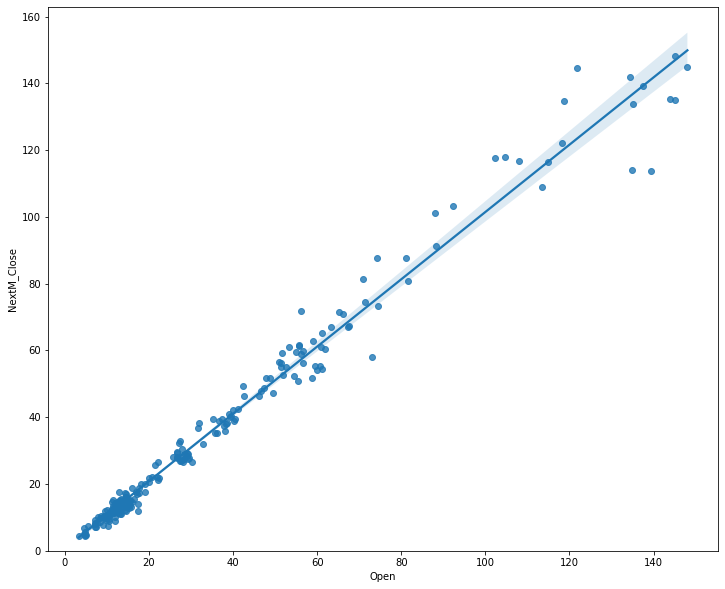

In [19]:
# import the visualization package: seaborn

import seaborn as sns
%matplotlib inline 

# Variable High

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Open", y="NextM_Close", data=df)
plt.ylim(0,)

(0.0, 159.07694043042258)

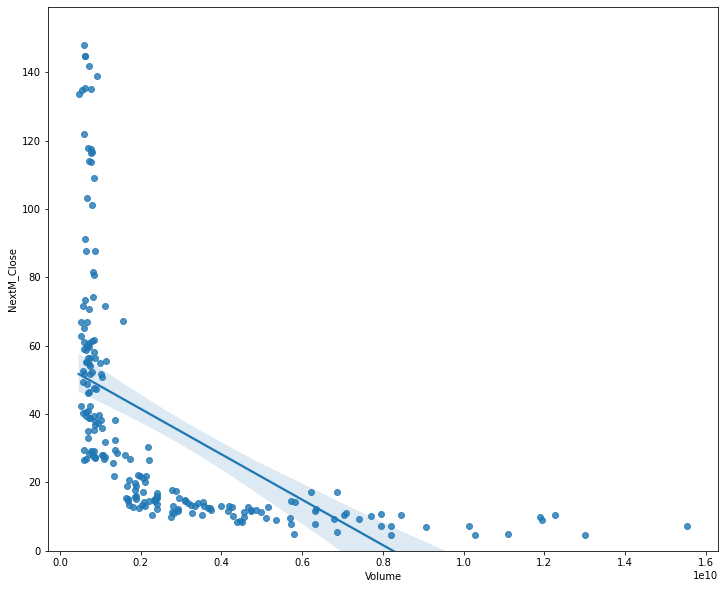

In [20]:
# Variable Volume

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Volume", y="NextM_Close", data=df)
plt.ylim(0,)

Comparing the regression plot of "High" and "Volume", we see that the points for "High" are much closer to the generated line and, on average, increase. The points for "Volume" have more spread around the predicted line and on average decreases.

## Residuals

/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


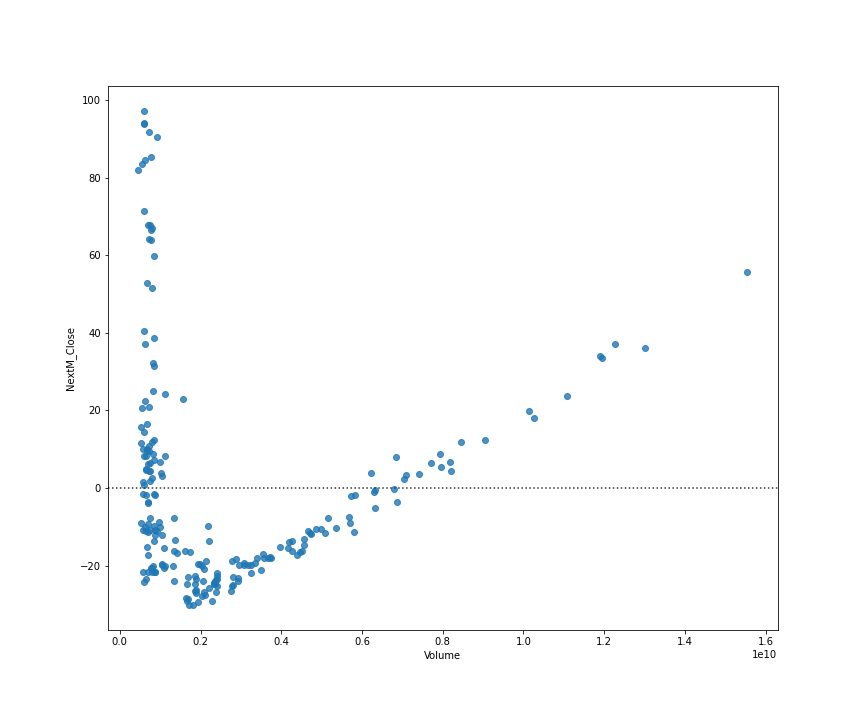

<Figure size 864x720 with 0 Axes>

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Volume'], df['NextM_Close'])
plt.show()



We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that a non-linear model may ne more appropriate for this variable Volume.

## Multiple Linear Regression Visualization


### Prediction

In [22]:
Yhat = lm.predict(Z)

In [23]:
Yhat[0:5]

array([2.79524421, 4.20507583, 4.94303981, 4.86440692, 3.85257463])

### Distribution Plot

/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


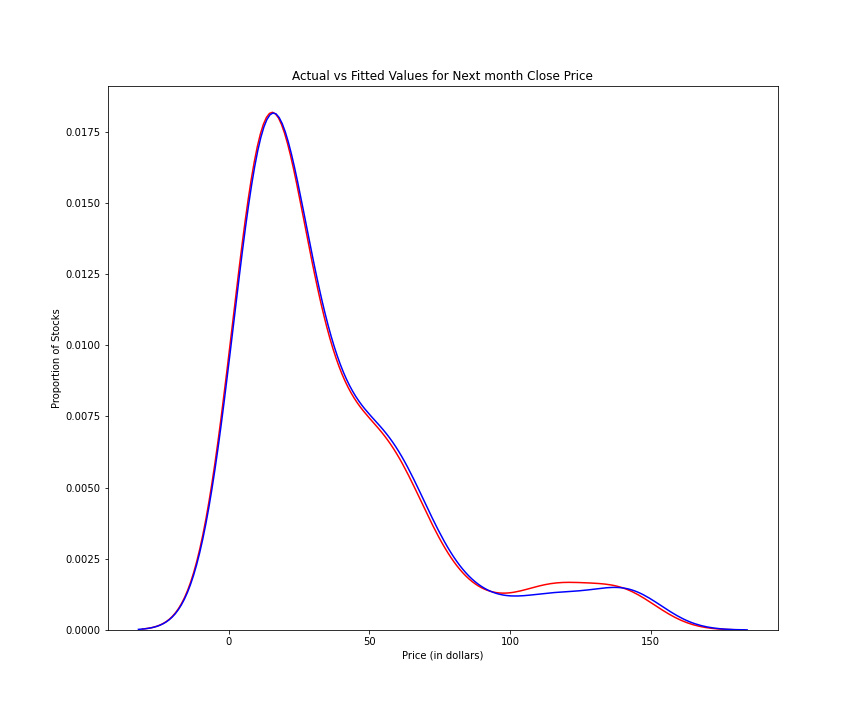

In [24]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['NextM_Close'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Next month Close Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Stocks')

plt.show()
plt.close()

We can see that the fitted values are almost fully closed with the actual values since the two distributions nearly totally overlap. So, the MLR model is the most appropriate one.

# 3. Polynomial Regression and Pipelines

We saw earlier that a linear model did not provide the best fit while using "Volume" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [25]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Next Month Price ~ Volume')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('NextM_Close')

    plt.show()
    plt.close()

In [26]:
# Let's get the variables:

x = df['Volume']
y = df['NextM_Close']

In [27]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)


            11             10             9             8             7
6.795e-106 x  - 5.483e-95 x  + 1.928e-84 x - 3.878e-74 x + 4.922e-64 x
              6             5             4             3             2
 - 4.095e-54 x + 2.243e-44 x - 7.882e-35 x + 1.652e-25 x - 1.677e-16 x + 7.193e-09 x + 104.1


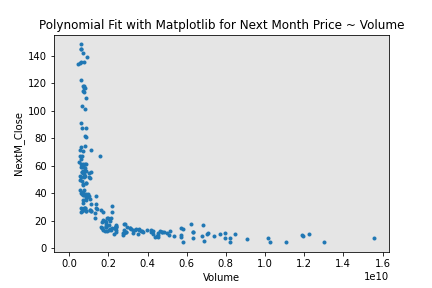

In [28]:
PlotPolly(p, x, y, 'Volume')

In [29]:
# Let's also perform a polynomial transform on multiple features, to check if we can improve the performance of the model:

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# create a PolynomialFeatures object of degree 11:

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [32]:
Z_pr=pr.fit_transform(Z)

In [33]:
Z.shape

(214, 2)

In the original data, there are 214 samples and 2 features.

In [34]:
Z_pr.shape

(214, 6)

After the transformation, there are 214 samples and 6 features.

## Pipelines

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.
We'll create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [37]:
# We input the list as an argument to the pipeline constructor:

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
# Then, we can normalize the data, perform a transform and fit the model simultaneously.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe=pipe.predict(Z)
ypipe

array([  6.84132618,   7.28144666,   6.51652339,   7.43021818,
         6.68572103,   7.03117268,   7.31520426,   7.68340699,
         5.04902288,   8.72370823,   8.43540947,   8.57350719,
         9.0113591 ,   9.66374707,  10.29370252,   8.27690858,
         8.14762471,   7.7875535 ,  10.14383591,  10.65228383,
         9.99931592,  10.85882041,  10.06392832,  10.0699707 ,
        10.48543828,  12.03071204,  12.19413764,  11.76094066,
        12.59899105,  11.30230153,  11.56712813,  11.90294656,
        12.42143394,  12.98209533,  12.7424456 ,  12.81185763,
        13.35933641,  15.11793382,  16.84529933,  15.3622153 ,
        12.32142233,  11.76394743,  11.35049265,  14.16181746,
        14.33371981,  12.91850645,  11.77740789,  11.93095427,
        10.31403963,   9.7343032 ,   8.05578686,   8.47284425,
         9.03377738,   9.03921032,   8.94212197,   9.71539005,
        10.48639687,  10.64630682,  10.97834492,  11.29048048,
        12.314284  ,  13.22397199,  14.58189855,  15.35

In [40]:
pipe.score(Z,df['NextM_Close'])

0.9830619981562169

# 4. Measures for In-Sample Evaluation¶

Let's take a look at the values for the different models:

Variables Open and Volume:

Multiple Linear Regression:
R-squared: 0.981
MSE: 22.25

Variable Volume with polynomial fit:

In [41]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.5763671063584817


In [42]:
# We can say that ~57.6 % of the variation of Next Month Close price is explained by this polynomial fit with Variable "Volume"

In [43]:
mean_squared_error(df['NextM_Close'], p(x))

500.35166093269567

Polynomial Fit: Using Volume as a Predictor Variable of Price.
R-squared: 0.58
MSE: 500.35

Linear Regression Fit: Using Volume as a Predictor Variable of Price.
R-squared: 0.28
MSE: 848

#### Summing up, when using Volume as a variable for polynomial fit, clearly it achieves a better result than with LRM (see comparison above). In case it is Open as variable, although the R^2 is similar in both cases, the RLM reaches a slightly better performance mainly as it has a lower MSE (16.05 vs 18.2)